In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("train.csv")

In [6]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Cleaning the data


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<p>We can check that age, cabin and Embarked has null values hence we need to fix them</p>
<OL>
    <li>replace null age with median(age) of passengers.
</li>
    <li>
drop cabin column as it has too many null values
</li>
    <li>
we will keep embarked unchanged as it has no effect on results.</li>
</OL>

In [8]:
data["Age"]=data["Age"].fillna(data["Age"].median())

In [9]:
data= data.drop(columns=["Cabin"])

In [10]:
gender_survival_data=data.groupby("Sex").agg({"Survived":"mean", "PassengerId":"count"}).reset_index()

In [11]:
gender_survival_data

,Sex,Survived,PassengerId
0,female,0.742038,314
1,male,0.188908,577


## Analysis keypoints
<UL>
    <li>
        Female survival rate was higher(74.2%) compared to males(18.9%).
    </li>
    <li>
        233 females out of 314 total females survived, while only 109 men survived out of 577 onboard.
    </li>
</UL>

In [12]:
data["familysize"]=data["SibSp"]+data["Parch"]+1

In [16]:
Family_average_fare=data.groupby("familysize")["Fare"].mean().reset_index()

## Analysis keypoints
<UL>
    <li>
        Families of 6 people paid highest average price \$73.72.
    </li>
    <li>
        Solo travelers paid lowest price per family i.e \$21.24.
    </li>
    <li>
        Trend shows that Families with high numbers of members paid higher price per family however price per person is lower. 
    </li>
</UL>

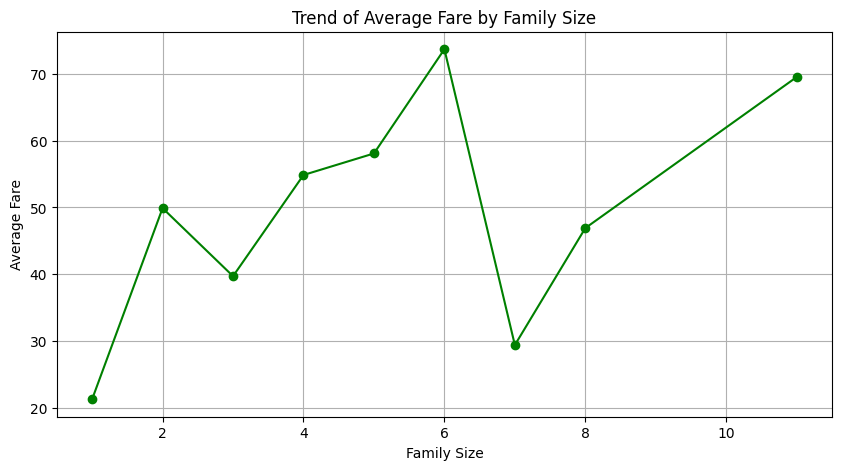

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(Family_average_fare["familysize"], Family_average_fare["Fare"], marker='o', linestyle='-', color='green')
plt.xlabel("Family Size")
plt.ylabel("Average Fare")
plt.title("Trend of Average Fare by Family Size")
plt.grid(True)
plt.show()

How did survival rates vary by age group?

In [21]:
bins=[1,12,18,25,35,60,100]
labels=["Child","Teenager","Young Adult","Adult","Middle Aged","Senior"]    
data["AgeGroup"]=pd.cut(data["Age"], bins=bins, labels=labels, right=False) 
survivalby_agegroup= data.groupby("AgeGroup",observed=False)["Survived"].mean().reset_index()
print(survivalby_agegroup)

      AgeGroup  Survived
0        Child  0.524590
1     Teenager  0.488889
2  Young Adult  0.345455
3        Adult  0.343915
4  Middle Aged  0.416268
5       Senior  0.269231


## Survival rates of different age groups in titanic
<p>This graph shows the survival rates of different age groups on Titanic
</p>

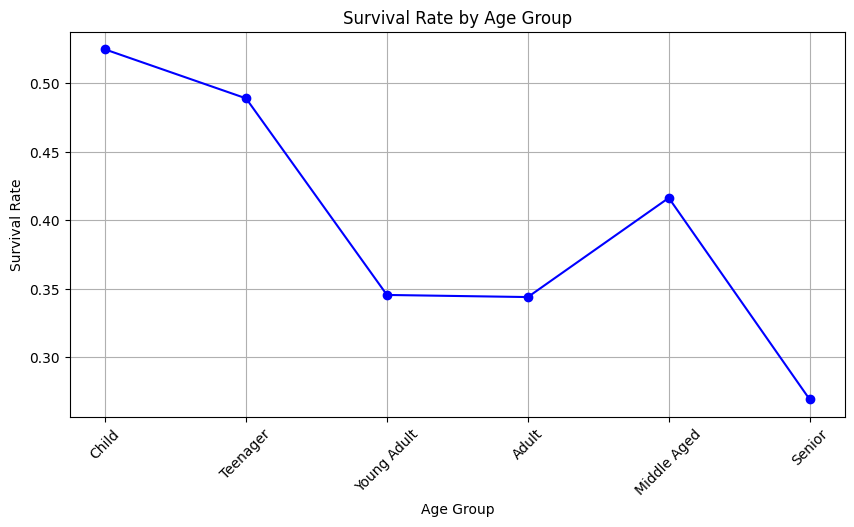

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(survivalby_agegroup["AgeGroup"], survivalby_agegroup["Survived"], marker='o', linestyle='-', color='blue')
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Visualizing the survival 